Import Pakages

In [2]:
import numpy,math
from PIL import Image
from matplotlib import pyplot as plt
from pathlib import Path
# from collections import Counter

Some Utilities

In [39]:
def read_img(img_path:str)->Image.Image:
    img = Image.open(img_path)
    return img

def parse_img(img_dir:str,d:int)->list[Image.Image]:
    img_path_generator = Path(img_dir).glob(r'*.png')
    img_list=[]
    img_thumbnail_list=[]
    for img_path in img_path_generator:
        img = read_img(img_path)
        img = img.convert("RGB")
        img_list.append(img)
        img.thumbnail((500,500))
        pixels = img.load()
        for i in range(img.size[0]):
            for j in range(img.size[1]):
                if pixels[i, j] == (0, 0, 0):
                    pixels[i, j] = (255, 0, 0)
        img_thumbnail_list.append(img)
    new_img_list = []
    for img,thumb_img in zip(img_list,img_thumbnail_list):
        colors = Image.Image.getcolors(thumb_img,thumb_img.size[0]*thumb_img.size[1])
        colors = [c for c in colors if c[1]!=(255,0,0)]
        colors.sort(reverse=True)
        colors = colors[0:24]
        mean_color = sum(i*numpy.array(j) for i,j in colors)/sum(i for i,_ in colors)
        new_img_list.append(img_filter(img,tuple(map(int,mean_color)),d))
    return img_list,new_img_list

def img_filter(img:Image.Image,threshold:tuple,d:int)->Image.Image:
    img = img.convert('RGB')
    R = (255,0,0)
    new_imdata = []
    for color in img.getdata():
        if RGB_diff(color,threshold) > d:
            new_imdata.append(R)
        else:
            new_imdata.append(color)
    new_image = Image.new(mode=img.mode,size=img.size)
    new_image.putdata(new_imdata)

    return new_image

def RGB_diff(color:tuple,threshold:tuple)->float:
    delta_R = color[0]-threshold[0]
    delta_G = color[1]-threshold[1]
    delta_B = color[2]-threshold[2]
    R_mean = (color[0]+threshold[0])/2
    if R_mean<128:
        return math.sqrt(2*delta_R**2+4*delta_G**2+3*delta_B**2)
    else:
        return math.sqrt(3*delta_R**2+4*delta_G**2+2*delta_B**2)
    
def getMeanColor(new_img_list):
    mean_color = []
    for img in new_img_list:
        data =[]
        for c in img.getdata():
            if c!=(255,0,0):
                data.append(c)
        mean_color.append(numpy.mean(data,axis=0).astype('int'))
    return mean_color

def rgb2hex(color):
    return '#{:02x}{:02x}{:02x}'.format(color[0],color[1],color[2])

def plot_colors(mean_colors):
    r = math.ceil(len(mean_colors)/10)
    fig, ax = plt.subplots(int(r), 10, figsize=(12, 12))
    index = 0
    for c in mean_colors:
        img = Image.new(mode='RGB',size=(10,10),color=tuple(c))
        ax[index//10,index%10].imshow(img)
        ax[index//10,index%10].set_title("{:03d}{}".format(index+1,rgb2hex(c)))
        ax[index//10,index%10].set_xticks([])
        ax[index//10,index%10].set_yticks([])
        index += 1
    plt.tight_layout()
    plt.show()


Some Conifgs

In [4]:
img_path = "./0501_BLUE/"
distance = 45

In [5]:
img_list,new_img_list = parse_img(img_path,distance)

In [21]:
mean_colors = getMeanColor(new_img_list)

In [41]:
numpy.savetxt("mean_colors.txt", mean_colors)

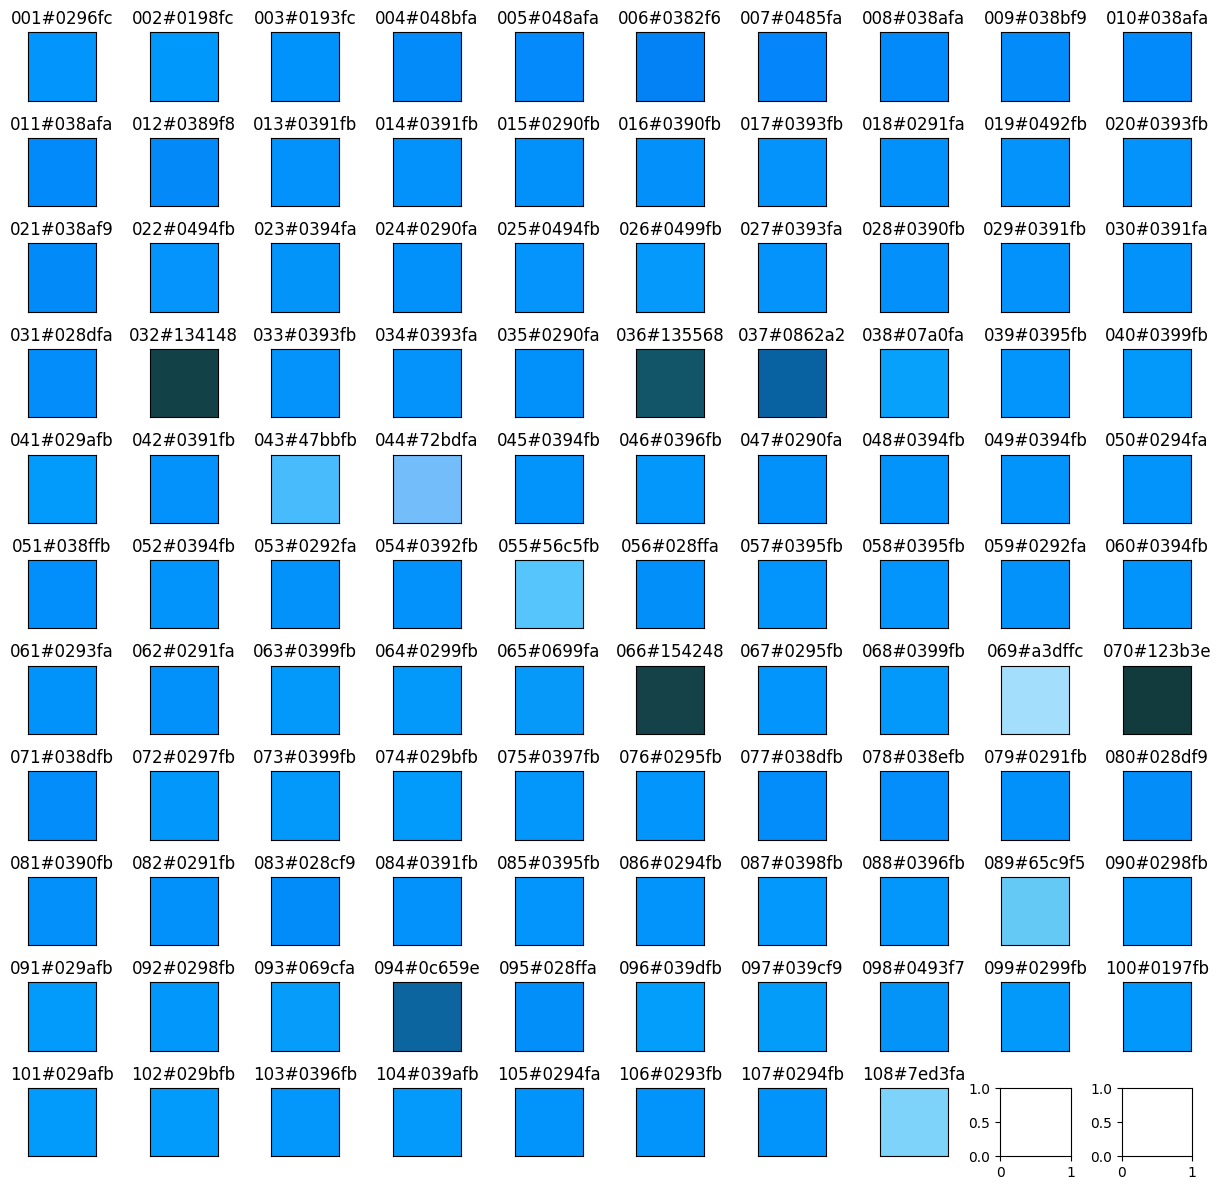

In [40]:
plot_colors(mean_colors)